In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import time

# Histogram-based processing

# 4.1

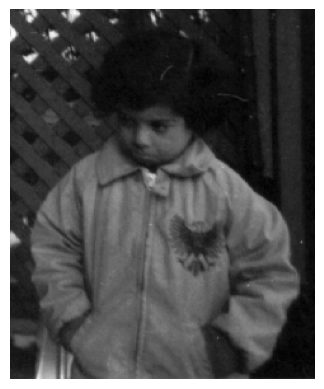

In [2]:
IMG = skimage.io.imread('pout.tif')
IMG = skimage.util.img_as_float(IMG)
plt.imshow(IMG, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
def histogram(img, n_bins=100):
    hist = np.zeros(n_bins)
    for p in img.ravel():
        bin_index = int(p * (n_bins - 1))
        hist[bin_index] += 1
    return hist

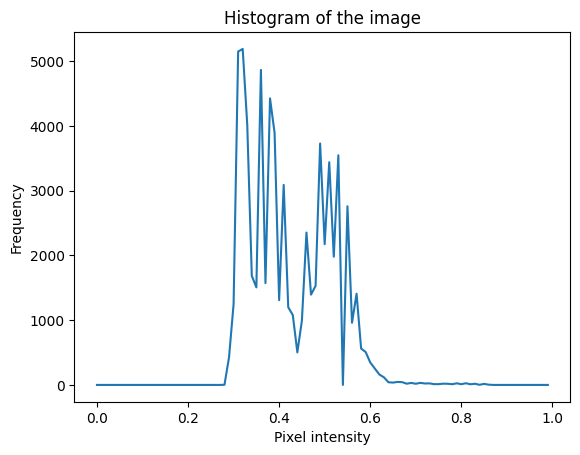

In [4]:
n_bins = 100
hist = histogram(IMG, n_bins)

plt.figure()
plt.plot(np.arange(n_bins) / n_bins, hist)
plt.title('Histogram of the image')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.show()

In [5]:
def CDF(hist):
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / cdf[-1]  
    return cdf_normalized

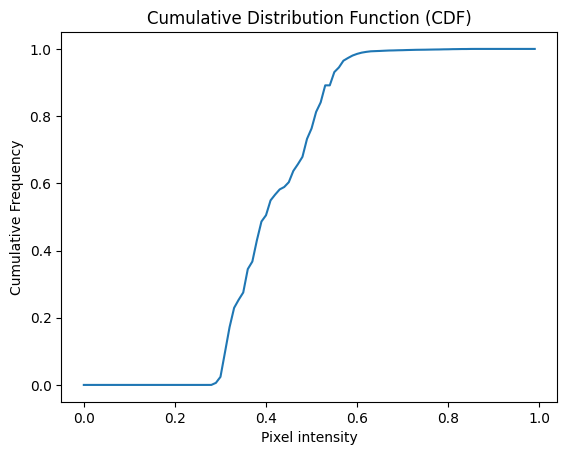

In [6]:
# CDF
cdf = np.cumsum(hist)
cdf_normalized = cdf / cdf[-1]  
plt.figure()
plt.plot(np.arange(n_bins) / n_bins, cdf_normalized)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Pixel intensity')
plt.ylabel('Cumulative Frequency')
plt.show()

# 4.2

In [7]:
def floatingPointImage(img, n_bins=100):
    cimg = np.zeros_like(img)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            p = img[x, y]
            bin_index = int(p * (n_bins - 1))
            cimg[x, y] = cdf_normalized[bin_index]
    return cimg


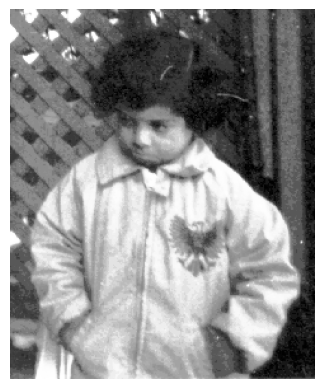

In [8]:
CImage = floatingPointImage(IMG, n_bins)
plt.imshow(CImage, cmap='gray')
plt.axis('off')
plt.show()

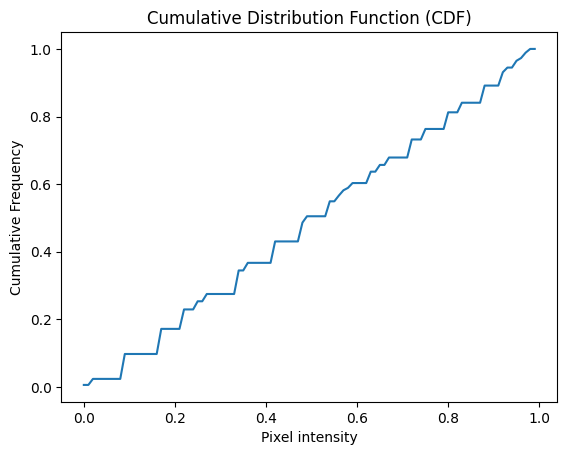

In [9]:
h = CDF(histogram(CImage))
plt.figure()
plt.plot(np.arange(n_bins) / n_bins, h)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Pixel intensity')
plt.ylabel('Cumulative Frequency')
plt.show()

## 4.3

In [10]:
def inverse_CDF(l, cdf):
    return np.min(np.where(cdf >= l)) / len(cdf)

## 4.4

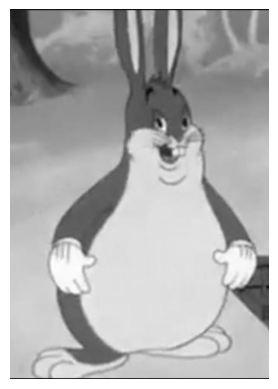

In [11]:
I1 = skimage.util.img_as_float(skimage.io.imread('image.png', as_gray=True))
I2 = IMG

plt.imshow(I1, cmap='gray')
plt.axis('off')
plt.show()

In [16]:
def histogramMatching(source, target, n_bins=100):
    cdf_source = CDF(histogram(source, n_bins))
    cdf_target = CDF(histogram(target, n_bins))

    J = np.zeros_like(source)
    for x in range(source.shape[0]):
        for y in range(source.shape[1]):
            p = source[x, y]
            bin_index = int(p * (n_bins - 1))
            l = cdf_source[bin_index]
            J[x, y] = inverse_CDF(l, cdf_target)

    return J

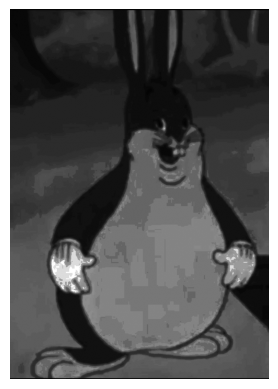

In [17]:
J = histogramMatching(I1, I2, n_bins)

plt.imshow(J, cmap='gray')
plt.axis('off')
plt.show()

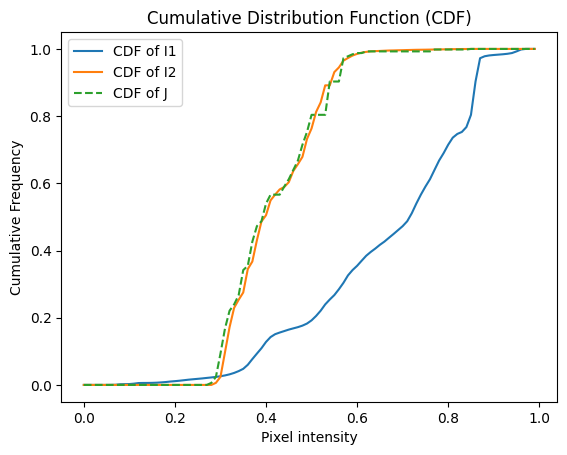

In [18]:
plt.figure()
plt.plot(np.arange(n_bins) / n_bins, C1, label='CDF of I1')
plt.plot(np.arange(n_bins) / n_bins, C2, label='CDF of I2')
plt.plot(np.arange(n_bins) / n_bins, CDF(histogram(J)), label='CDF of J', linestyle='--')
plt.legend()
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Pixel intensity')
plt.ylabel('Cumulative Frequency')
plt.show()